In [1]:
import numpy as np

import scipy
from scipy.io import loadmat
from scipy import optimize

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import NonUniformImage
from matplotlib import cm
matplotlib.style.use('ggplot')
%matplotlib inline

%load_ext autoreload
%autoreload 2

# 1 K-Mean Clustering

In [2]:
kMeanfile_path = '../course_materials/ex7data2.mat'
kMeanData = loadmat(kMeanfile_path)
kMeanData.keys()
kMeanData['X'].shape

(300, 2)

<function matplotlib.pyplot.show(*args, **kw)>

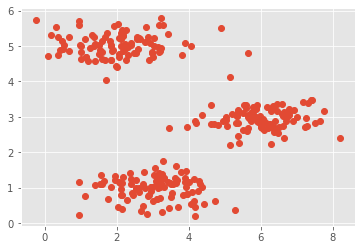

In [3]:
X = kMeanData['X']
plt.plot(X[:,:1],X[:,1:], 'o')
plt.show

In [4]:
def initiate_k_centroids(X, k):
    kIndices = np.random.choice(X.shape[0], k, replace=False)
    return X[kIndices]

def get_closest_centroid(X, k, centroid):
    centroidDistance = np.zeros((X.shape[0], k))
    for i in range(k):
        centroidDistance[:,i] = np.sum((X-centroid[i])**2, axis=1)
    return np.argmin(centroidDistance, axis=1)
        
def update_k_centroids(X, k, closestCentroid):
    kCentroids = np.zeros((k,X.shape[1]))
    for i in range(k):
        iCluster = X[np.where(closestCentroid==i)]
        iClusterCentre = np.mean(iCluster, axis=0)
        kCentroids[i] = iClusterCentre
    return kCentroids

In [5]:
def k_mean_clustering(X, k, iterations):
    centroidHistory = np.zeros((iterations+1, k, X.shape[1]))
#     Initialize centroids
    centroid = initiate_k_centroids(X, k)
    centroidHistory[0,:,:] = centroid
#     Perform iterations
    for i in range(iterations):
#         Find closes centroids
        closestCentroid = get_closest_centroid(X, k, centroid)
#         Update centroids
        centroid = update_k_centroids(X, k, closestCentroid)
        centroidHistory[i+1,:,:] = centroid
    return centroid, centroidHistory

ValueError: 'c' argument has 300 elements, which is not acceptable for use with 'x' with size 300, 'y' with size 300.

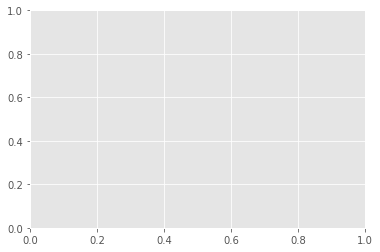

In [6]:
X = kMeanData['X']
k = 3
iterations = 5
K = k_mean_clustering(X, k, iterations)[1]
centroid = k_mean_clustering(X, k, iterations)[0]
clusterAssignment = get_closest_centroid(X, k, centroid)
plt.scatter(X[:,:1],X[:,1:], c=clusterAssignment)
plt.plot(K[:,0,:1],K[:,0,1:], 'x-', ms=9, mew=3)
plt.plot(K[:,1,:1],K[:,1,1:], 'x-', ms=9, mew=3)
plt.plot(K[:,2,:1],K[:,2,1:], 'x-', ms=9, mew=3)
plt.show

In [ ]:
birdPNG = 'bird_small.png'

# This creates a three-dimensional matrix A whose first two indices 
# identify a pixel position and whose last index represents red, green, or blue.
bird = scipy.misc.imread(birdPNG)
print (bird.shape)
plt.imshow(bird)
birdReshaped = bird.reshape(bird.shape[0]*bird.shape[1], bird.shape[2])/255
birdReshaped.shape

In [ ]:
k = 16
iterations = 10
birdCentroid = k_mean_clustering(birdReshaped, k, iterations)[0]
birdClustered = get_closest_centroid(birdReshaped, k, birdCentroid)
print(birdClustered.shape)
birdRecoloured = np.zeros(birdReshaped.shape)
for i in range(birdReshaped.shape[0]):
    birdRecoloured[i,:] = birdCentroid[birdClustered[i],:]
newBird = birdRecoloured.reshape(bird.shape)
plt.imshow(newBird)

# 2 Principal Component Analysis

In [ ]:
PCA_file_path = 'ex7data1.mat'
kMeanData = loadmat(PCA_file_path)
kMeanData.keys()
kMeanData['X'].shape

In [ ]:
X = kMeanData['X']
plt.plot(X[:,:1],X[:,1:], 'o')
plt.show

In [ ]:
def normalise_data(X):
    '''Returns normalised feature for a matrix or a vector'''
    return (X-np.mean(X, 0))/np.std(X, 0)

def covMatrix_SVD(X):
    '''Returns U, Sigma, and V'''
#     For matrix X(n,k), returns covariance matrix (k,k)
    Sigma = np.dot(X.T, X)/X.shape[0]
#     Some matrix-magic need to look up  
    return np.linalg.svd(Sigma, full_matrices=1, compute_uv=1)

In [ ]:
normX = normalise_data(X)
plt.plot(normX[:,:1],normX[:,1:], 'o')
plt.show
U, Sigma, V = covMatrix_SVD(normX)
print(U)
print(Sigma)
print(np.dot(normX.T, normX)/normX.shape[0])

### 2.1.1 Test Singular Vector Decomposition
For the test dataset should return [-.707, -.707] (Andrew Ng)

In [ ]:
normX = normalise_data(X)
U, Sigma, V = covMatrix_SVD(normX)
print("Top Principal Component (Eigen Vector) is", U[:,:1])

In [ ]:
# "...output the top principal component (eigen- vector) found, 
# and you should expect to see an output of about [-0.707 -0.707]"

X = kMeanData['X']
plt.plot(X[:,:1],X[:,1:], 'o')
meanX = np.mean(X, 0)
#at the mean of the data
plt.plot([meanX[0], meanX[0] + Sigma[0]*U[0,0]], 
         [meanX[1], meanX[1] + Sigma[0]*U[0,1]],
         linewidth=3,
        label='First Principal Component')
plt.plot([meanX[0], meanX[0] + Sigma[1]*U[1,0]], 
         [meanX[1], meanX[1] + Sigma[1]*U[1,1]],
         linewidth=3,
         label='Second Principal Component')
plt.axis('equal')
plt.legend()
plt.show

## 2.2 Dimentionality Reduction Using PCA

In [ ]:
def get_projection(X, U, K):
    topK_U = U[:,:K]
    return np.dot(X, topK_U)

### 2.2.2 Test Projecting Data onto K-Top Principal Components
First in the data set should produce the output of approximately 1.481 (or -1.48) (Andrew Ng)

In [ ]:
K = 1
projectionX = get_projection(normX, U, K)
print(projectionX[0])

In [ ]:
def recoverData(projectionX, U, K):
    topK_U = U[:,:K]
    return np.dot(projectionX, topK_U.T)

### 2.2.3 Test Projecting Data onto K-Top Principal Components
First in the data set should produce the output of approximately [-1.047 -1.047] (Andrew Ng)

In [ ]:
recoveredX = recoverData(projectionX,U,1)
print(recoveredX[0])

In [ ]:
normX = normalise_data(X)
plt.plot(normX[:,:1],normX[:,1:], 'o')
plt.plot(recoveredX[:,:1],recoveredX[:,1:], 'o')
for i in range(X.shape[0]):
    plt.plot([normX[i,0],recoveredX[i,0]], [normX[i,1], recoveredX[i,1]], 'k--')
plt.axis('equal')
plt.show

## 2.3 Face-Image Dataset

In [ ]:
facefile_path = 'ex7faces.mat'
faceData = loadmat(facefile_path)
print(faceData.keys())
faces = faceData['X']
print(faces.shape)

In [ ]:
np.random.seed(100)
def faceDatum(x, squareSide):
    '''converts vector x (1,1024) into a matrix (32,32)'''
#     by default order='C', but in this case the lines are assembled in wrong order
    return np.reshape(x, (squareSide, squareSide), order='F')

def showRandomFace(dataSet, squareSide):
    fig = plt.figure(figsize=(2, 2))
    face = faceDatum(dataSet[np.random.randint(dataSet.shape[0])], squareSide)
    plt.imshow(face, cmap = 'gist_gray')
    plt.axis('off')
    return plt.show()

def showHundredFaces(visualisationSet, squareSide):
    fig = plt.figure(figsize=(10, 10))
    for row in range(10):
        for column in range(10):
            digit = faceDatum(visualisationSet[10*row+column], squareSide)
            sub = plt.subplot(10, 10, 10*row+column+1)
            sub.axis('off')
            sub.imshow(digit, cmap = 'gist_gray')
    return plt.show()

In [ ]:
n_samples, n_variables = faces.shape
squareSide = 32
# showRandomFace(facesData['X'], squareSide)
random_index = np.random.randint(faces.shape[0], size = 100)
visualisationSet = faces[random_index,:]
showHundredFaces(visualisationSet, squareSide)

In [ ]:
normFaces = normalise_data(faces)
facesPCA = covMatrix_SVD(normFaces)
facesU = facesPCA[0]
print (facesPCA[0].shape)

In [ ]:
K = 100
projectionFaces = get_projection(normFaces, facesU, K)
recoveredFaces = recoverData(projectionFaces, facesU, K)
print(recoveredFaces.shape)

n_samples, n_variables = recoveredFaces.shape
squareSide = 32
random_index = np.random.randint(recoveredFaces.shape[0], size = 100)
visualisationSet = recoveredFaces[random_index,:]
showHundredFaces(visualisationSet, squareSide)

## 2.4 Visualisation Using PCA

In [ ]:
normBird = normalise_data(birdReshaped)
print(normBird.shape)
birdU, birdSigma, birdV = covMatrix_SVD(normBird)
print(birdU.shape)

In [ ]:
K = 2
projectBird = get_projection(normBird, birdU, K)


In [ ]:
# Make the 2D plot
plt.scatter(projectBird[:,:1], projectBird[:,1:], c=birdClustered, s=5)
plt.grid(True)